# Conditional Probability

Conditional probability is a measure of the probability of an event occurring given that another event has occurred.

`P(A|B)` is the probability of A given that B already occured. 

In [1]:
#!pip install numpy
#!pip install pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('../data/student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **school**: student's school (***`binary`***: 'GP' or 'MS')
- **sex**: student's sex (***`binary`***: 'F' - female or 'M' - male)
- **address**: student's home address type (***`binary`***: 'U'-urban, or 'R'-rural)
- **studytime**: weekly study time (***`numeric`***: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **schoolsup**: extra educational support (***`binary`***: yes or no)
- **internet**: Internet access at home (***`binary`***: yes or no)
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [4]:
data = data[['school','sex','address','studytime','schoolsup','internet','G1','G2','G3']]
print(data.shape)
data.head()

(395, 9)


,school,sex,address,studytime,schoolsup,internet,G1,G2,G3
0,GP,F,U,2,yes,no,5,6,6
1,GP,F,U,2,no,yes,5,5,6
2,GP,F,U,2,yes,yes,7,8,10
3,GP,F,U,3,no,yes,15,14,15
4,GP,F,U,2,no,no,6,10,10


## Conditional Probability Examples  

### Example 1. Analyzing the influence in grades of the weekly number of study hours

**Example 1**. Determine the probability a student gets grades (`G1`, `G2`, `G3`) greater than or equal to 60%, given we know he studies more than 5 hours a week.

Let's create the boolean variables `G1pass`, `G2pass` and `G3pass`. If G1 grade >= 60%, `G1pass` will be `1`, and `0` otherwise. Original `G1`, `G2`, and `G3` values are on a 0–20 scale, so we multiply them by 5 to get a percent.

In [5]:
data['G1pass'] = np.where(data.G1 * 5 >= 60, 1, 0)
data['G2pass'] = np.where(data.G2 * 5 >= 60, 1, 0)
data['G3pass'] = np.where(data.G3 * 5 >= 60, 1, 0)
data.head()

,school,sex,address,studytime,schoolsup,internet,G1,G2,G3,G1pass,G2pass,G3pass
0,GP,F,U,2,yes,no,5,6,6,0,0,0
1,GP,F,U,2,no,yes,5,5,6,0,0,0
2,GP,F,U,2,yes,yes,7,8,10,0,0,0
3,GP,F,U,3,no,yes,15,14,15,1,1,1
4,GP,F,U,2,no,no,6,10,10,0,0,0


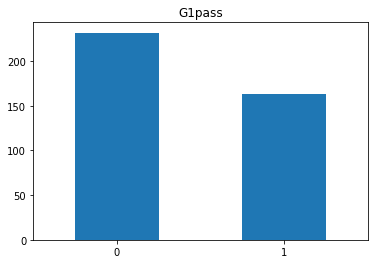

In [6]:
# Frequency Distribution of G1pass
data.G1pass.value_counts().plot(kind='bar', rot=True, title='G1pass');

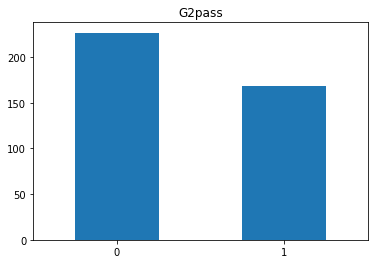

In [7]:
# Frequency Distribution of G2pass
data.G2pass.value_counts().plot(kind='bar', rot=True, title='G2pass');

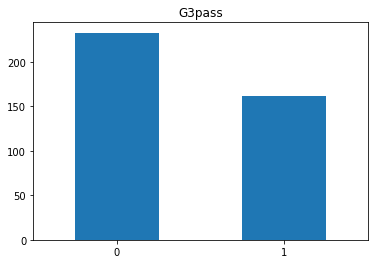

In [8]:
# Frequency Distribution of G3pass
data.G3pass.value_counts().plot(kind='bar', rot=True, title='G3pass');

As you can see, more students fail than pass the three exams.

Let's make another boolean variable: `StudyHard`. If studytime >= 3 (>5 hours), StudyHard will be 1, and 0 otherwise.

In [9]:
data['StudyHard'] = np.where(data.studytime >= 3, 1, 0)
data.head()

,school,sex,address,studytime,schoolsup,internet,G1,G2,G3,G1pass,G2pass,G3pass,StudyHard
0,GP,F,U,2,yes,no,5,6,6,0,0,0,0
1,GP,F,U,2,no,yes,5,5,6,0,0,0,0
2,GP,F,U,2,yes,yes,7,8,10,0,0,0,0
3,GP,F,U,3,no,yes,15,14,15,1,1,1,1
4,GP,F,U,2,no,no,6,10,10,0,0,0,0


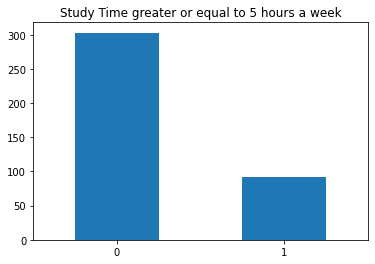

In [10]:
# Frequency Distribution of StudyHard
data.StudyHard.value_counts().plot(kind='bar', rot=True, title='Study Time greater or equal to 5 hours a week');

#### Computing P(G1pass|StudyHard)

Let's calculate the crosstab:

In [11]:
c1 = pd.crosstab(data.G1pass, data.StudyHard, margins=True)
c1

StudyHard,0,1,All
G1pass,,,
0,188,44,232
1,115,48,163
All,303,92,395


The formula for conditional probability: $P(G1pass|StudyHard)=\frac{P(G1pass \bigcap StudyHard)}{P(StudyHard)}$

In [12]:
print('P(G1pass and StudyHard) = %.2f' %(48/395)) 

P(G1pass and StudyHard) = 0.12


In [13]:
print('P(StudyHard) = %.2f' %(92/395)) 

P(StudyHard) = 0.23


In [14]:
print('P(G1pass | StudyHard) = %.2f' %(48/92)) 

P(G1pass | StudyHard) = 0.52


In [15]:
# Automatizing the process
print('P(G1pass | StudyHard) = %.2f' %(c1[1][1]/c1[1]['All'])) 

P(G1pass | StudyHard) = 0.52


Another way

In [16]:
data.G1pass[data.StudyHard == 1].value_counts(normalize=True)

1    0.521739
0    0.478261
Name: G1pass, dtype: float64

In [17]:
print('P(G1pass | StudyHard) = %.2f' 
       %(data.G1pass[data.StudyHard == 1].value_counts(normalize=True)[1])) 

P(G1pass | StudyHard) = 0.52


#### Computing P(G2pass | StudyHard)

In [18]:
print('P(G2pass | StudyHard) = %.2f' 
       %(data.G2pass[data.StudyHard == 1].value_counts(normalize=True)[1])) 

P(G2pass | StudyHard) = 0.53


#### Computing P(G3pass | StudyHard)

In [19]:
print('P(G3pass | StudyHard) = %.2f' 
       %(data.G3pass[data.StudyHard == 1].value_counts(normalize=True)[1])) 

P(G3pass | StudyHard) = 0.51


### Example 2. Exploring the impact of internet access at home on students' grades

**Example 2**: Determine the probability a student gets grades (`G1`, `G2`, `G3`) greater than or equal to 60%, given he has internet access at home.

Let's use the boolean variables `G1pass`, `G2pass` and `G3pass`, and `internet`

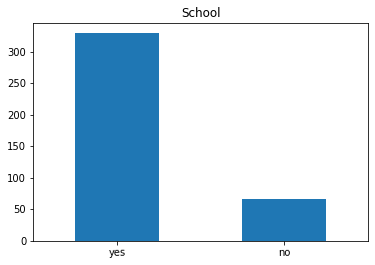

In [20]:
data.internet.value_counts().plot(kind='bar', rot=True, title='School');

#### Computing P(G1pass | internet)

In [21]:
print('P(G1pass | StudyHard) = %.2f' 
       %(data.G1pass[data.internet == 'yes'].value_counts(normalize=True)[1])) 

P(G1pass | StudyHard) = 0.43


#### Computing P(G2pass | internet)

In [22]:
print('P(G2pass | StudyHard) = %.2f' 
       %(data.G2pass[data.internet == 'yes'].value_counts(normalize=True)[1])) 

P(G2pass | StudyHard) = 0.45


#### Computing P(G3pass | internet)

In [23]:
print('P(G3pass | StudyHard) = %.2f' 
       %(data.G3pass[data.internet == 'yes'].value_counts(normalize=True)[1])) 

P(G3pass | StudyHard) = 0.43


## Total Probability Law

**Example 3**: Calculate the probability of passing the final test G3, knowing the weekly study time of students.

The variable `studytime` represents the weekly study time with the values:
- 1: <2 hours, 
- 2: 2 to 5 hours, 
- 3: 5 to 10 hours, 
- 4: >10 hours)

We can calculate:
- P(G3pass|studytime=1)
- P(G3pass|studytime=2)
- P(G3pass|studytime=3)
- P(G3pass|studytime=4)

And finally, we will get the total probability of passing the final test `G3` (`G3pass`).

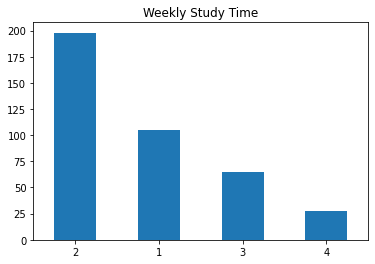

In [24]:
data.studytime.value_counts().plot(kind='bar', rot=True, title='Weekly Study Time');

In [25]:
# Getting the frequencies of the different values
data.studytime.value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

In [26]:
# Getting the relative frequencies of the different values
data.studytime.value_counts(normalize=True)

2    0.501266
1    0.265823
3    0.164557
4    0.068354
Name: studytime, dtype: float64

In [27]:
st1 = data.studytime.value_counts(normalize=True)[1]
st2 = data.studytime.value_counts(normalize=True)[2]
st3 = data.studytime.value_counts(normalize=True)[3]
st4 = data.studytime.value_counts(normalize=True)[4]

In [28]:
# Getting the probabilities of the different values
print('P(studytime = 1) = %.2f' %(st1))
print('P(studytime = 2) = %.2f' %(st2))
print('P(studytime = 3) = %.2f' %(st3))
print('P(studytime = 4) = %.2f' %(st4))

P(studytime = 1) = 0.27
P(studytime = 2) = 0.50
P(studytime = 3) = 0.16
P(studytime = 4) = 0.07


In [29]:
# Computing the conditional probability
p3givenst1 = data.G3pass[data.studytime == 1].value_counts(normalize=True)[1]
p3givenst2 = data.G3pass[data.studytime == 2].value_counts(normalize=True)[1]
p3givenst3 = data.G3pass[data.studytime == 3].value_counts(normalize=True)[1]
p3givenst4 = data.G3pass[data.studytime == 4].value_counts(normalize=True)[1]

In [30]:
# Computing the conditional probability
print('P(G3pass | studytime = 1) = %.2f' %(p3givenst1))
print('P(G3pass | studytime = 2) = %.2f' %(p3givenst2))
print('P(G3pass | studytime = 3) = %.2f' %(p3givenst3))
print('P(G3pass | studytime = 4) = %.2f' %(p3givenst4))

P(G3pass | studytime = 1) = 0.42
P(G3pass | studytime = 2) = 0.36
P(G3pass | studytime = 3) = 0.51
P(G3pass | studytime = 4) = 0.52


**Total Probability Law**

In [31]:
print('P(G3pass) = P(G3pass | studytime=1)*P(studytime=1) + P(G3pass | studytime=2)*P(studytime=2) + ')
print('            P(G3pass | studytime=3)*P(studytime=3) + P(G3pass | studytime=4)*P(studytime=4)')

P(G3pass) = P(G3pass | studytime=1)*P(studytime=1) + P(G3pass | studytime=2)*P(studytime=2) + 
            P(G3pass | studytime=3)*P(studytime=3) + P(G3pass | studytime=4)*P(studytime=4)


In [32]:
pG3pass = p3givenst1*st1 + p3givenst2*st2 + p3givenst3*st3 + p3givenst4*st4

In [33]:
print('P(G3pass) = (%.2f)*(%.2f) + (%.2f)*(%.2f) + (%.2f)*(%.2f) + (%.2f)*(%.2f) = %.2f' %(
                    p3givenst1, st1, p3givenst2, st2, p3givenst3, st3, p3givenst4, st4, pG3pass))

P(G3pass) = (0.42)*(0.27) + (0.36)*(0.50) + (0.51)*(0.16) + (0.52)*(0.07) = 0.41


## Bayes' Rule

**Example 4**: We chose a student randomly, and he passed. Calculate the probability:
- he studied 2 to 5 hours a week (`studytime = 2`)
- he studied between 5 and 10 hours a week  (`studytime = 3`)

### P(st=2 | G3pass)

Bayes' Rule

$P(st=2|G3pass)=\frac{P(G3pass|st=2)P(st=2)}{P(G3pass|st=1)P(st=1)+P(G3pass|st=2)P(st=2)+P(G3pass|st=3)P(st=3)+P(G3pass|st=4)P(st=4)}$

In [34]:
# The formula in the denominator is the total probability law.
print('P(G3pass) = (%.2f)*(%.2f) + (%.2f)*(%.2f) + (%.2f)*(%.2f) + (%.2f)*(%.2f) = %.2f' %(
                    p3givenst1, st1, p3givenst2, st2, p3givenst3, st3, p3givenst4, st4, pG3pass))

P(G3pass) = (0.42)*(0.27) + (0.36)*(0.50) + (0.51)*(0.16) + (0.52)*(0.07) = 0.41


In [35]:
print('P(st2 | G3pass) = P(G3pass | st2)*P(st2) / P(G3pass) = %.2f' %(p3givenst2*st2/pG3pass))

P(st2 | G3pass) = P(G3pass | st2)*P(st2) / P(G3pass) = 0.44


### P(st=3 | G3pass)

In [36]:
# The formula in the denominator is the total probability law.
print('P(G3pass) = (%.2f)*(%.2f) + (%.2f)*(%.2f) + (%.2f)*(%.2f) + (%.2f)*(%.2f) = %.2f' %(
                    p3givenst1, st1, p3givenst2, st2, p3givenst3, st3, p3givenst4, st4, pG3pass))

P(G3pass) = (0.42)*(0.27) + (0.36)*(0.50) + (0.51)*(0.16) + (0.52)*(0.07) = 0.41


In [37]:
print('P(st3 | G3pass) = P(G3pass | st3)*P(st3) / P(G3pass) = %.2f' %(p3givenst3*st3/pG3pass))

P(st3 | G3pass) = P(G3pass | st3)*P(st3) / P(G3pass) = 0.20


Reference:
- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer, chapter 2